CARGA DE PAQUETES

In [ ]:
#Importar paquetes
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.pyplot import figure
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedKFold
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.extmath import weighted_mode
weighted_mode
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

IMPORTAR Y LEER BASES DE DATOS

In [ ]:
general = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/general_data.csv', sep=";")
intime = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/in_time.csv')
smanager = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/manager_survey_data.csv')
outtime = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/out_time.csv')
retirement = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/retirement_info.csv', sep=";")
semployee = pd.read_csv('https://raw.githubusercontent.com/anaperez10/Analiticalll/main/Bases%20de%20datos/employee_survey_data.csv') 

DEPURACIÓN BASES DE DATOS

- Base de información general

In [ ]:
general.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
#Inciamos con la depuración de la base de datos 2, que tiene información general de los empleados
general.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#conocer el tipo de variables
general.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
#Mirar las dimensiones de la base
general.shape

(4410, 23)

In [ ]:
#imprimir categorias de las variables
lista = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']
for i in lista:
    print(general[i].value_counts())
    print('------------------------------------')

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
------------------------------------
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
------------------------------------
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
------------------------------------
Male      2646
Female    1764
Name: Gender, dtype: int64
------------------------------------
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
------------------------------------
Married    

In [ ]:
#definimos un nuevo DF con las variables de interés
info2 = general[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
info2.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,23420,4.0,12,8,2,9.0,2,6,0,4


In [ ]:
#tratamiento de datos nulos
info2.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

- Base encuesta satisfaccion a los empleados

In [ ]:
semployee.head(8)
#ID empleado / Satisfacción : ambiente / laboral / equilibrio vida - trabajo

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0


In [ ]:
#Mirar las dimensiones de la base
semployee.shape

(4410, 4)

In [ ]:
#conocer el tipo de variables
semployee.dtypes

EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [ ]:
#imprimir categorias de las variables
lista = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for i in lista:
    print(semployee[i].value_counts())
    print('------------------------------------')

3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64
------------------------------------
4.0    1367
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64
------------------------------------
3.0    2660
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64
------------------------------------


In [ ]:
#tratamiento de datos nulos
semployee.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

- Base Encuesta de desempeño de los empleados hecha por los jefes

In [ ]:
smanager.head(8)
#nivel de participación en el trabajo / calificación de desempeño del año anterior

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4


In [ ]:
#Mirar las dimensiones de la base
smanager.shape

(4410, 3)

In [ ]:
#conocer el tipo de variables
smanager.dtypes

EmployeeID           int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object

In [ ]:
#imprimir categorias de las variables
lista = ['JobInvolvement', 'PerformanceRating']
for i in lista:
    print(smanager[i].value_counts())
    print('------------------------------------')

3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64
------------------------------------
3    3732
4     678
Name: PerformanceRating, dtype: int64
------------------------------------


In [ ]:
#tratamiento de datos nulos
smanager.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

- Base información de retiro

In [ ]:
retirement.head(8)
# desgaste / fecha de retiro / tipo de retiro / motivo de renuncia

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/07/2016,Resignation,Stress
2,14,Yes,08/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,08/02/2016,Resignation,Salary
5,36,Yes,18/06/2016,Resignation,Others
6,39,Yes,29/04/2016,Resignation,Stress
7,60,Yes,15/12/2016,Resignation,Others


In [ ]:
#Mirar las dimensiones de la base
retirement.shape

(711, 5)

In [ ]:
#imprimir categorias de las variables
lista = ['Attrition', 'retirementType', 'resignationReason']
for i in lista:
    print(retirement[i].value_counts())
    print('------------------------------------')

Yes    711
Name: Attrition, dtype: int64
------------------------------------
Resignation    641
Fired           70
Name: retirementType, dtype: int64
------------------------------------
Others    323
Salary    189
Stress    129
Name: resignationReason, dtype: int64
------------------------------------


In [ ]:
#Homologar los valores de la variable sin inf a others
retirement['resignationReason'] = retirement['resignationReason'].replace(['sin inf'],'Others')

NUEVAS BASES DE DATOS

In [ ]:
#Base de datos con la informacion de todos los empleados
df = pd.merge(info2,semployee, on = 'EmployeeID',how = 'left')
df1 = pd.merge(df,smanager, on = 'EmployeeID',how = 'left')
df1.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
#Base de datos de las personas que se han retirado de la empresa
df2 = pd.merge(retirement,df1, on = 'EmployeeID',how = 'left')
df2.head(5)

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason,Age,BusinessTravel,Department,DistanceFromHome,Education,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,2,Yes,15/10/2016,Resignation,Others,31,Travel_Frequently,Research & Development,10,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
1,7,Yes,20/07/2016,Resignation,Stress,28,Travel_Rarely,Research & Development,11,2,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
2,14,Yes,08/11/2016,Resignation,Others,47,Non-Travel,Research & Development,1,1,...,10.0,4,10,9,9,1.0,2.0,2.0,2,3
3,29,Yes,15/10/2016,Resignation,Others,44,Travel_Frequently,Research & Development,1,2,...,19.0,2,1,0,0,4.0,3.0,1.0,2,3
4,31,Yes,08/02/2016,Resignation,Salary,26,Travel_Rarely,Research & Development,4,3,...,5.0,5,3,0,2,1.0,2.0,3.0,2,3


In [ ]:
#Se eliminaron columnas de horas estandares y conteo de empleados
df1=df1.drop(['StandardHours','EmployeeCount'], axis=1)
df1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
#Observar tipo de datos
df1.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [ ]:
#Consultar el valor de los nulos 
df1.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
#Ver la dimension de la base de datos 1 y 2 
print(df1.shape)
print(df2.shape)

(4410, 25)
(711, 31)


In [ ]:
#Cambiar el tipo de retirement date a tipo fecha
df2['retirementDate'] = pd.to_datetime(df2['retirementDate'])
#Crear variable de mes 
df2['Mes'] = df2['retirementDate'].dt.month
#Crear variable de año 
df2['Año']=df2['retirementDate'].dt.year
df2

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason,Age,BusinessTravel,Department,DistanceFromHome,Education,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Mes,Año
0,2,Yes,2016-10-15,Resignation,Others,31,Travel_Frequently,Research & Development,10,1,...,5,1,4,3.0,2.0,4.0,2,4,10,2016
1,7,Yes,2016-07-20,Resignation,Stress,28,Travel_Rarely,Research & Development,11,2,...,0,0,0,1.0,3.0,1.0,3,4,7,2016
2,14,Yes,2016-08-11,Resignation,Others,47,Non-Travel,Research & Development,1,1,...,10,9,9,1.0,2.0,2.0,2,3,8,2016
3,29,Yes,2016-10-15,Resignation,Others,44,Travel_Frequently,Research & Development,1,2,...,1,0,0,4.0,3.0,1.0,2,3,10,2016
4,31,Yes,2016-08-02,Resignation,Salary,26,Travel_Rarely,Research & Development,4,3,...,3,0,2,1.0,2.0,3.0,2,3,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,4382,Yes,2016-04-18,Resignation,Salary,29,Travel_Rarely,Research & Development,7,1,...,4,0,1,3.0,4.0,2.0,3,4,4,2016
707,4387,Yes,2016-09-16,Resignation,Others,33,Travel_Rarely,Sales,11,4,...,5,0,4,3.0,4.0,1.0,2,4,9,2016
708,4389,Yes,2016-05-24,Resignation,Others,33,Travel_Rarely,Sales,1,3,...,9,1,7,1.0,1.0,4.0,3,3,5,2016
709,4392,Yes,2016-02-26,Fired,NaN,32,Travel_Rarely,Sales,23,1,...,3,1,2,4.0,3.0,1.0,3,3,2,2016


ANÁLISIS EXPLORATORIO

In [ ]:
# crear dataset
base = df1.groupby(['JobSatisfaction'])[['EmployeeID']].sum().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'EmployeeID', names ='JobSatisfaction',
             title= '<b>Satisfaccion laboral de los empleados<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = df2.groupby(['Año', 'Mes'])[['EmployeeID']].count().reset_index()
# MSSubClass: Tipo de edificio
# YrSold: Año en que se vende
# SalePrice: Precio de venta

# crear gráfica
fig = px.bar(base, x = 'Mes', y='EmployeeID', color = 'Año', barmode = 'group', title= '<b>Distribucion de empleados que abandonaron por mes en el año 2016<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Mes',
    yaxis_title = 'Abandonos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = df2.groupby(['resignationReason'])[['EmployeeID']].sum().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'EmployeeID', names ='resignationReason',
             title= '<b>Distribucion de razon de abandono <b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = df2.groupby(['JobSatisfaction'])[['EmployeeID']].sum().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'EmployeeID', names ='JobSatisfaction',
             title= '<b>Satisfaccion laboral de los que abandonaron <b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#Calcular la correlación de la base de datos 1 
df1.corr()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.006963,-0.035706,0.008649,-0.002884,-0.044314,0.299243,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089,0.010089,-0.003086,-0.021297,0.018196,-0.025563
DistanceFromHome,0.006963,1.000000,-0.008638,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584,0.020183,-0.011144,0.008000,-0.001837,0.036418
Education,-0.035706,-0.008638,1.000000,-0.009680,0.045746,0.006410,-0.016250,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358,-0.045469,-0.004173,-0.006406,-0.018279,-0.035591
EmployeeID,0.008649,-0.001097,-0.009680,1.000000,-0.003303,0.007338,-0.001117,-0.004456,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579,0.000798,-0.001053,-0.001723,0.008591,-0.006892
JobLevel,-0.002884,-0.037329,0.045746,-0.003303,1.000000,0.047316,-0.009875,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251,-0.024448,-0.018279,-0.027664,-0.012630,-0.002474
MonthlyIncome,-0.044314,-0.021607,0.006410,0.007338,0.047316,1.000000,-0.020726,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304,-0.006006,0.005063,0.003572,0.023346,0.016093
NumCompaniesWorked,0.299243,-0.013843,-0.016250,-0.001117,-0.009875,-0.020726,1.000000,0.030860,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667,0.013007,-0.056230,-0.008714,0.027985,0.017819
PercentSalaryHike,-0.033137,0.038125,-0.040531,-0.004456,0.010973,0.004325,0.030860,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864,0.000841,0.030808,-0.040601,-0.004658,0.773550
StockOptionLevel,-0.031753,0.011169,0.001261,-0.014254,0.000993,0.026930,0.017163,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757,-0.004591,0.039907,-0.022886,0.010295,-0.036348
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.001063,-0.036957,-0.033787,0.238807,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800,-0.002265,-0.016849,0.001119,0.006709,-0.001396


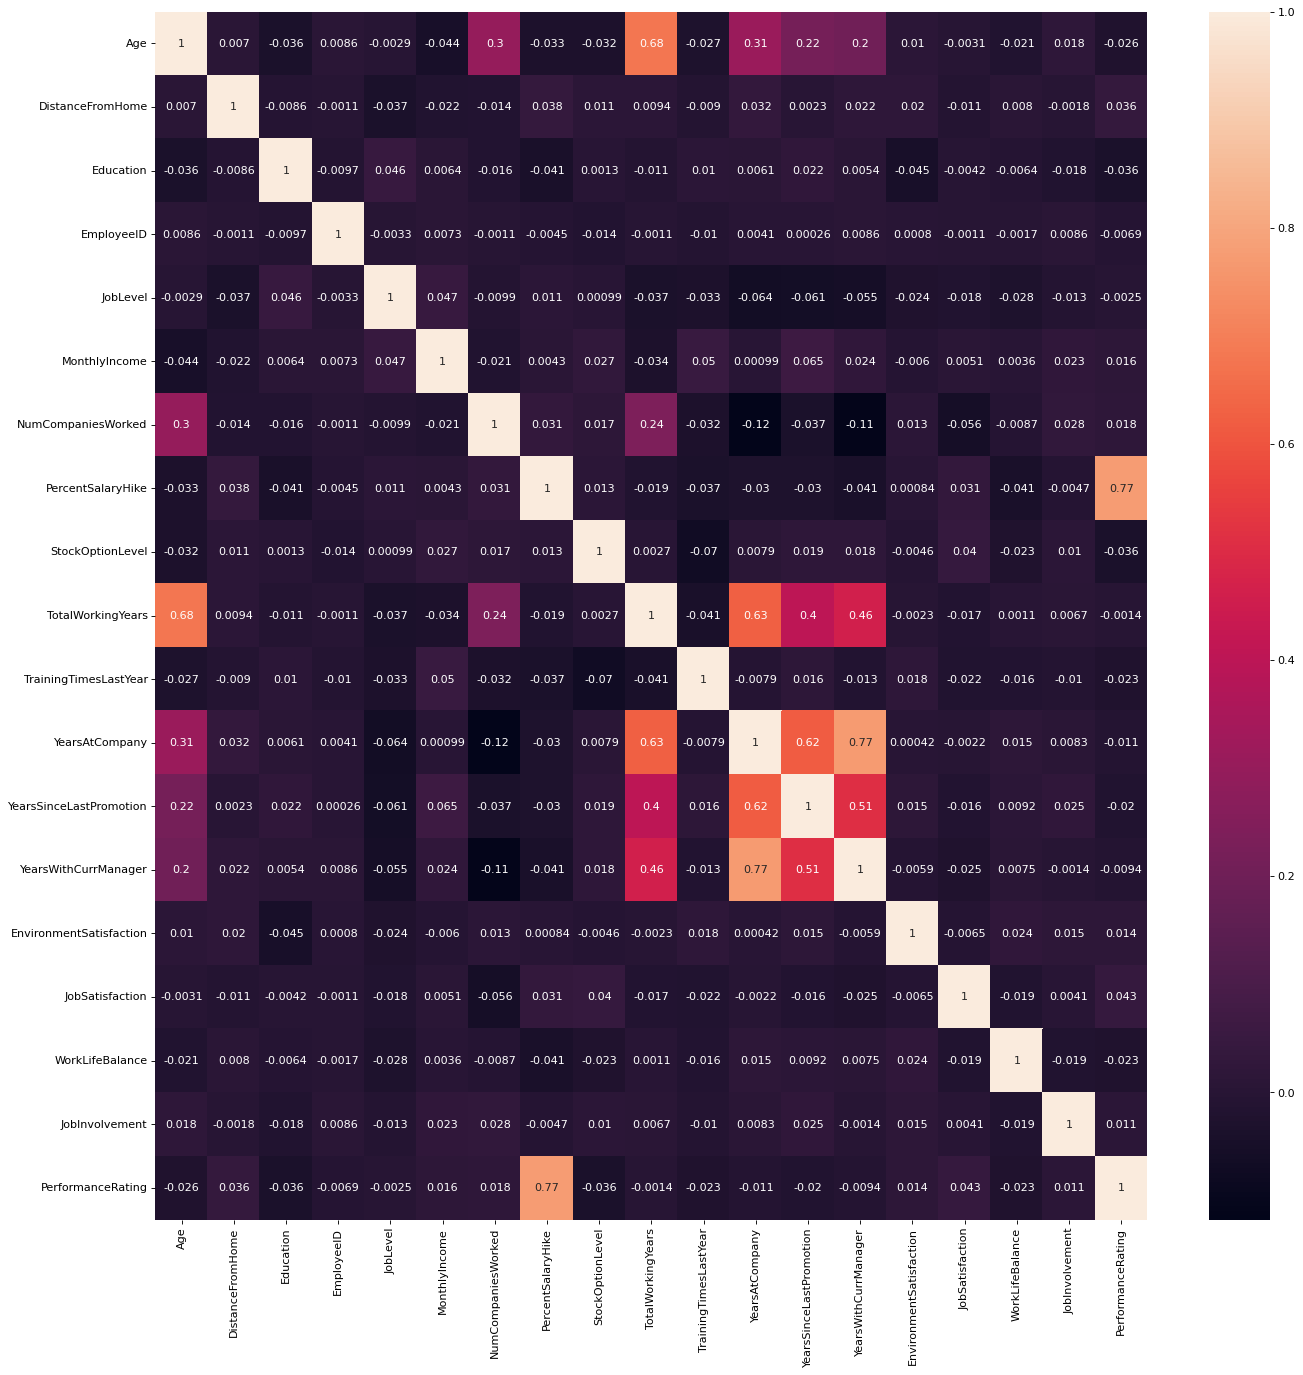

In [ ]:
#Para interpretar mejor las correlaciones se pueden usar gráficos
figure(figsize=(20, 20), dpi=80);
sns.heatmap(df1.corr(), annot = True);

In [ ]:
#Sacar las correlaciones
df1.corr().unstack().sort_values().head(10)

YearsAtCompany           NumCompaniesWorked        -0.117959
NumCompaniesWorked       YearsAtCompany            -0.117959
                         YearsWithCurrManager      -0.109667
YearsWithCurrManager     NumCompaniesWorked        -0.109667
StockOptionLevel         TrainingTimesLastYear     -0.069902
TrainingTimesLastYear    StockOptionLevel          -0.069902
JobLevel                 YearsAtCompany            -0.064219
YearsAtCompany           JobLevel                  -0.064219
YearsSinceLastPromotion  JobLevel                  -0.060811
JobLevel                 YearsSinceLastPromotion   -0.060811
dtype: float64

In [ ]:
# sacar las correlaciones más positivas
x = df1.corr().unstack().sort_values()
x[x<1].tail(10)

YearsSinceLastPromotion  YearsAtCompany             0.618409
YearsAtCompany           YearsSinceLastPromotion    0.618409
                         TotalWorkingYears          0.627703
TotalWorkingYears        YearsAtCompany             0.627703
                         Age                        0.680661
Age                      TotalWorkingYears          0.680661
YearsAtCompany           YearsWithCurrManager       0.769212
YearsWithCurrManager     YearsAtCompany             0.769212
PerformanceRating        PercentSalaryHike          0.773550
PercentSalaryHike        PerformanceRating          0.773550
dtype: float64

SELECCIÓN DE ALGORITMOS Y TÉCNICAS DE MODELADO

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23b36caed0>,
      dtype=object)

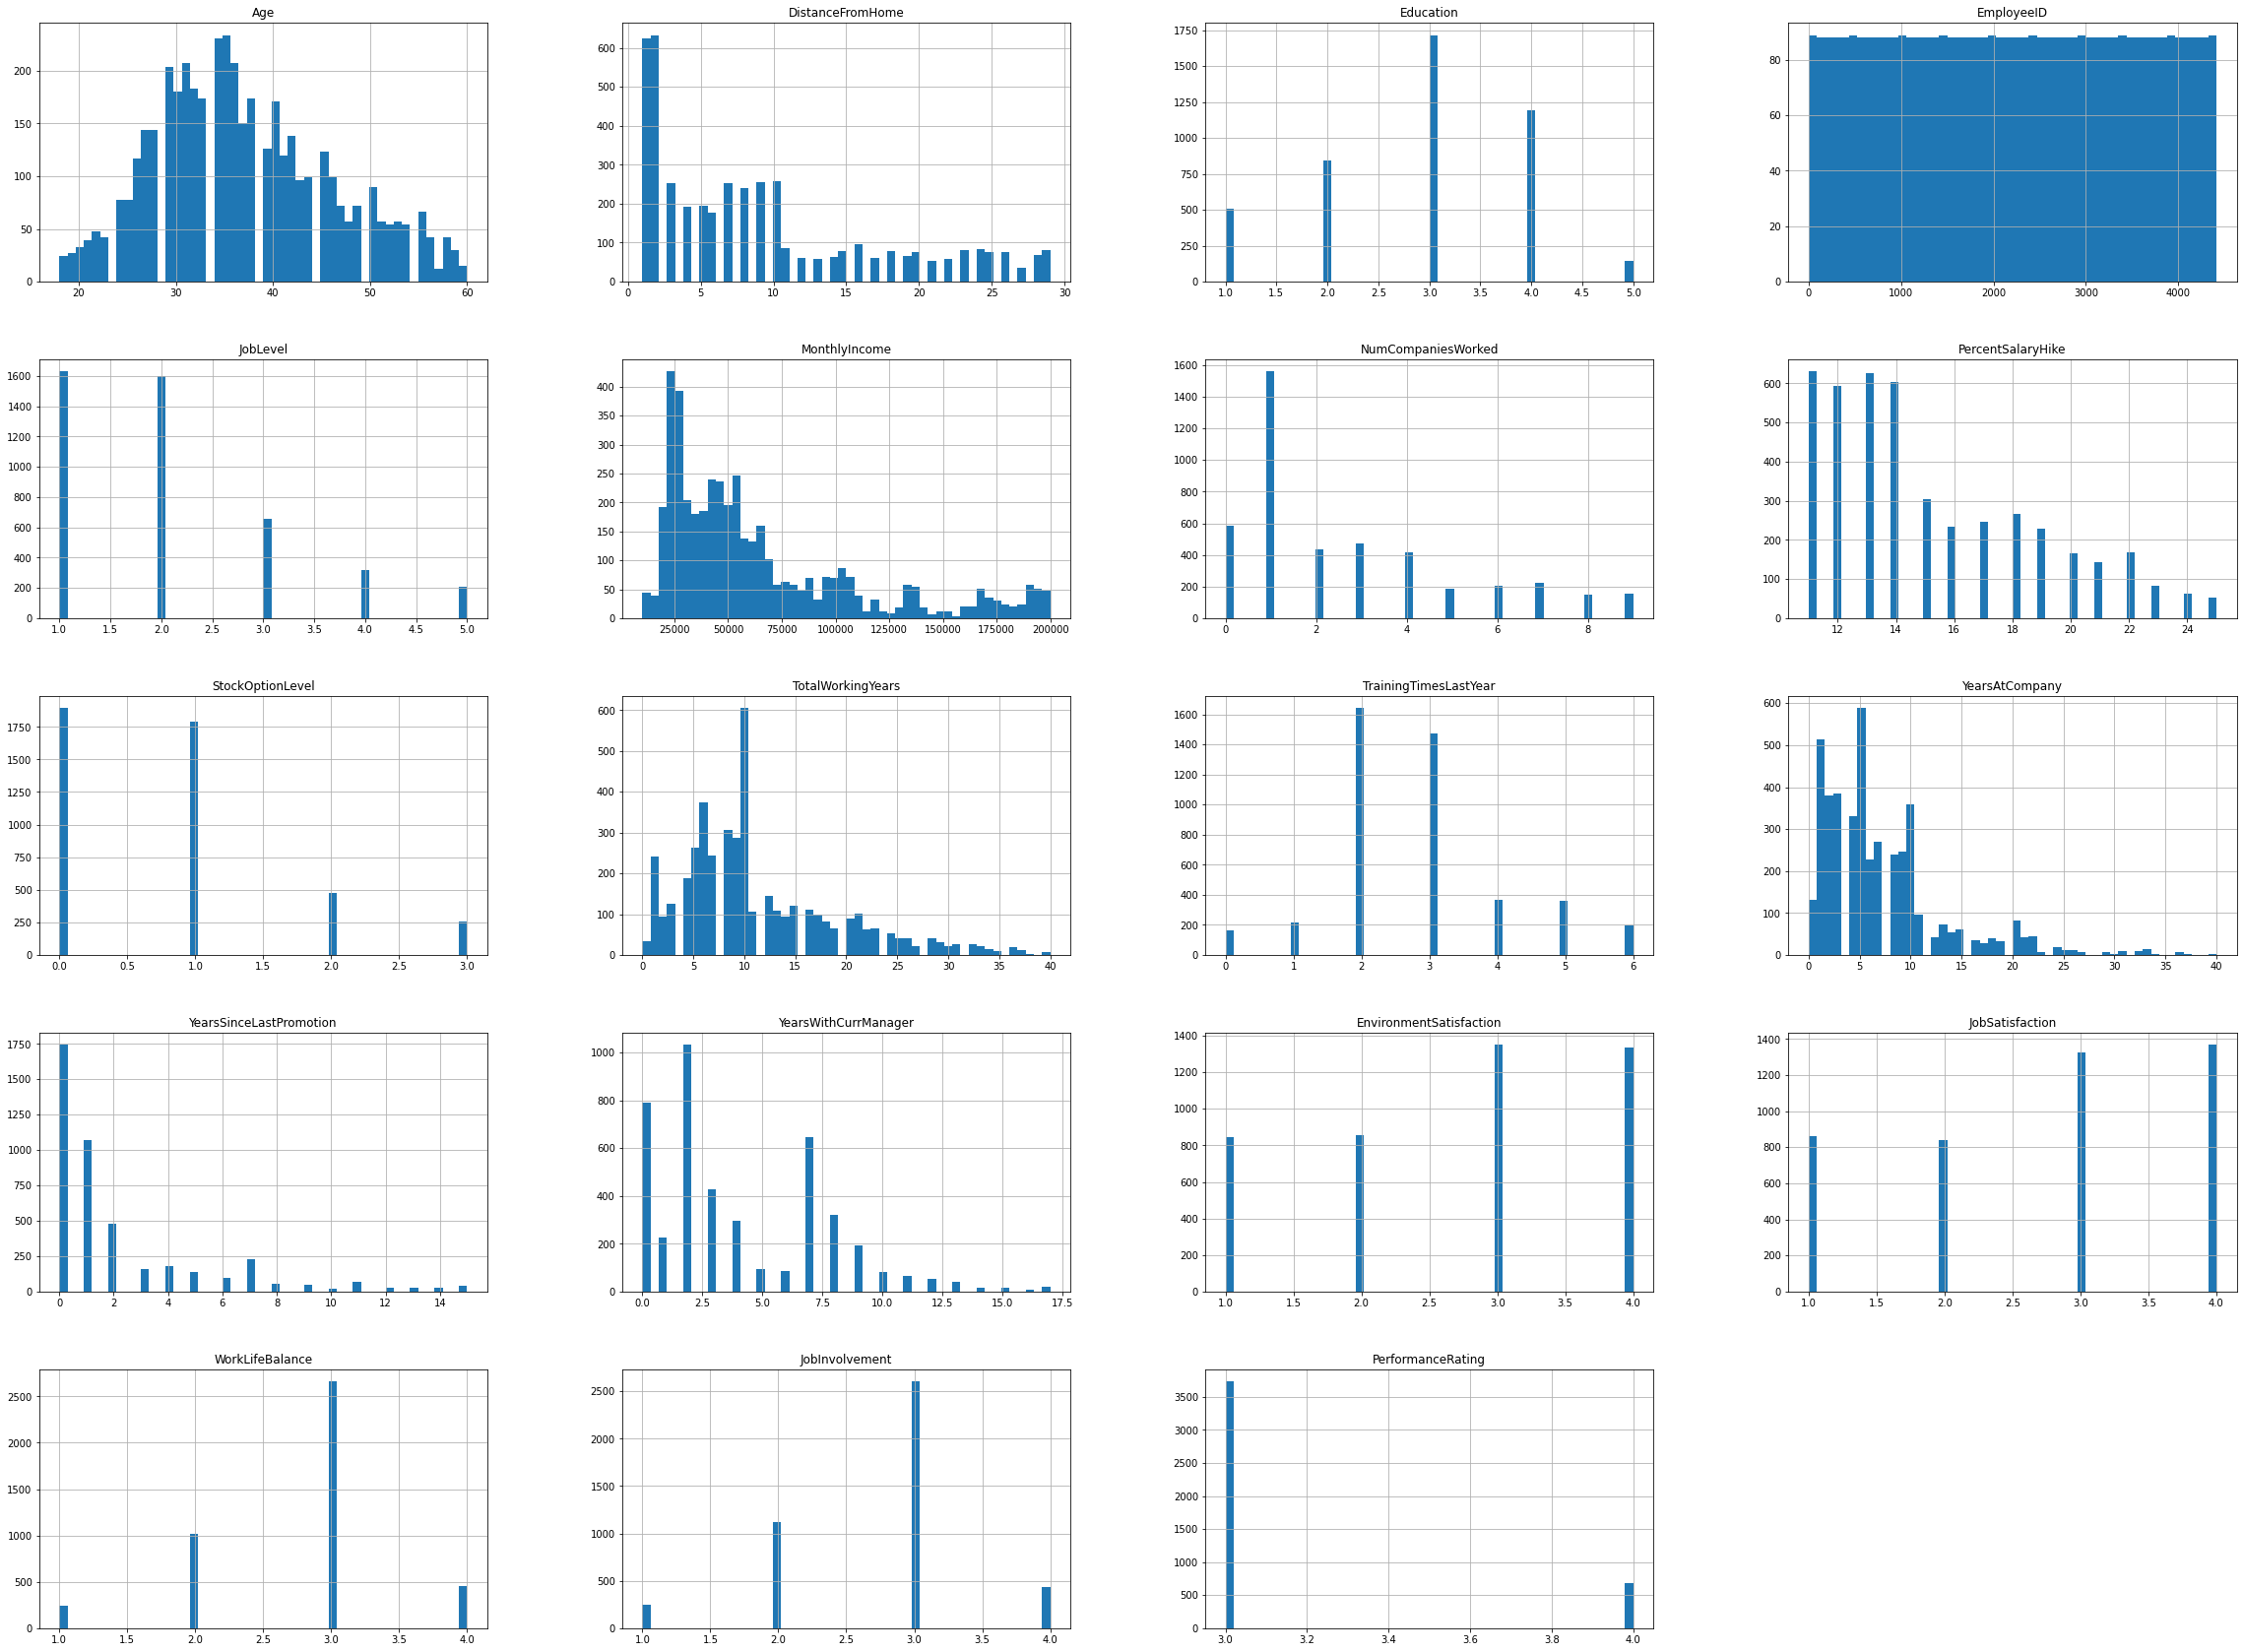

In [ ]:
#Generar el histograma de la base de datos 1 
df1.hist(bins=50,figsize = ( 40 , 30 ))

In [ ]:
#Organizar los valores de correlación con respecto a la satisfacción laboral 
corr_matrix = df1.corr()
corr_matrix["JobSatisfaction"].sort_values(ascending=False)

JobSatisfaction            1.000000
PerformanceRating          0.043261
StockOptionLevel           0.039907
PercentSalaryHike          0.030808
MonthlyIncome              0.005063
JobInvolvement             0.004058
EmployeeID                -0.001053
YearsAtCompany            -0.002166
Age                       -0.003086
Education                 -0.004173
EnvironmentSatisfaction   -0.006550
DistanceFromHome          -0.011144
YearsSinceLastPromotion   -0.016236
TotalWorkingYears         -0.016849
JobLevel                  -0.018279
WorkLifeBalance           -0.019104
TrainingTimesLastYear     -0.021514
YearsWithCurrManager      -0.024612
NumCompaniesWorked        -0.056230
Name: JobSatisfaction, dtype: float64

In [ ]:
#Se creo la función imputar la cual imputa con respecto a la moda y la mediana 
def imputar_f (df,list_cat,SimpleImputer,pd):  
        
    
    df_c=df[list_cat]
    df_n=df.loc[:,~df.columns.isin(list_cat)]

    imputer_n=SimpleImputer(strategy='median')
    imputer_c=SimpleImputer(strategy='most_frequent')

    imputer_n.fit(df_n)
    imputer_c.fit(df_c)

    X_n=imputer_n.transform(df_n)
    X_c=imputer_c.transform(df_c)

    df_n=pd.DataFrame(X_n,columns=df_n.columns)
    df_c=pd.DataFrame(X_c,columns=df_c.columns)

    df =pd.concat([df_n,df_c],axis=1)
    return df


In [ ]:
#Cambiar tipo de dato de entero a categorico
#Education (Cat), JobLevel (Cat), NumCompaniesWorked (Int), StockOptionLevel (Cat), TotalWorkingYears (Int), EnvSat (Cat), JobSat (Cat), WorkLifeBalance (Cat), JobInv (Cat), PerRat (Cat)
df1=df1.astype({'Education': object,'JobLevel': object,'StockOptionLevel': object,'JobInvolvement': object,'PerformanceRating': object,
            'EnvironmentSatisfaction': object,'JobSatisfaction': object,'WorkLifeBalance': object})
                

In [ ]:
#Se crea una lista con todas las variables categoricas 
list_cat=['BusinessTravel', 'Department','Education', 'EducationField','Gender','JobLevel','JobRole','MaritalStatus','StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating']

In [ ]:
#Utilizar función imputar 
df3=imputar_f(df1,list_cat,SimpleImputer, pd)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   float64
 1   DistanceFromHome         4300 non-null   float64
 2   EmployeeID               4300 non-null   float64
 3   MonthlyIncome            4300 non-null   float64
 4   NumCompaniesWorked       4300 non-null   float64
 5   PercentSalaryHike        4300 non-null   float64
 6   TotalWorkingYears        4300 non-null   float64
 7   TrainingTimesLastYear    4300 non-null   float64
 8   YearsAtCompany           4300 non-null   float64
 9   YearsSinceLastPromotion  4300 non-null   float64
 10  YearsWithCurrManager     4300 non-null   float64
 11  BusinessTravel           4300 non-null   object 
 12  Department               4300 non-null   object 
 13  Education                4300 non-null   object 
 14  EducationField          

In [ ]:
#Se conviertes las variables categoricas a variables dummies 
df_dummies=pd.get_dummies(df3,columns=['BusinessTravel', 'Department','Education', 'EducationField','Gender','JobLevel','JobRole','MaritalStatus','StockOptionLevel', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating'])
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   float64
 1   DistanceFromHome                   4300 non-null   float64
 2   EmployeeID                         4300 non-null   float64
 3   MonthlyIncome                      4300 non-null   float64
 4   NumCompaniesWorked                 4300 non-null   float64
 5   PercentSalaryHike                  4300 non-null   float64
 6   TotalWorkingYears                  4300 non-null   float64
 7   TrainingTimesLastYear              4300 non-null   float64
 8   YearsAtCompany                     4300 non-null   float64
 9   YearsSinceLastPromotion            4300 non-null   float64
 10  YearsWithCurrManager               4300 non-null   float64
 11  JobSatisfaction                    4300 non-null   objec

In [ ]:
#Observar variables de la base de datos 3 que incluye las dummies
df_dummies.columns

Index(['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobSatisfaction', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'Job

In [ ]:
# -tranformacion del vector target a un vector binario 
#1,2 representa insatisfacción del empleado 
df_dummies['JobSatisfaction'] = df_dummies['JobSatisfaction'].replace([1,2],0)
#3,4 represanta satisfacción del empleado
df_dummies['JobSatisfaction'] = df_dummies['JobSatisfaction'].replace([3,4],1)

In [ ]:
#Se crea X con el rest de variables de la variable target 
z#y representa el target: JobSatisfaction
X=df_dummies.loc[:,~df_dummies.columns.isin(['JobSatisfaction','EmployeeID'])]
y=df_dummies.JobSatisfaction
y = y.astype('int')
X

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4
0,51.0,6.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
1,31.0,10.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,...,0,0,0,1,0,1,0,0,0,1
2,32.0,17.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,...,1,0,0,0,0,0,1,0,1,0
3,38.0,2.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,...,0,0,1,0,0,1,0,0,1,0
4,32.0,10.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,4.0,35390.0,1.0,18.0,6.0,2.0,6.0,1.0,5.0,...,0,0,1,0,0,1,0,0,1,0
4296,42.0,5.0,60290.0,3.0,17.0,10.0,5.0,3.0,0.0,2.0,...,0,0,1,0,0,0,1,0,1,0
4297,29.0,2.0,26790.0,2.0,15.0,10.0,2.0,3.0,0.0,2.0,...,0,0,1,0,0,1,0,0,1,0
4298,25.0,25.0,37020.0,0.0,20.0,5.0,4.0,4.0,1.0,2.0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
4295    1
4296    0
4297    1
4298    1
4299    0
Name: JobSatisfaction, Length: 4300, dtype: int64

In [ ]:
#Modelos que se van a implementar
DTC = DecisionTreeClassifier()
m_rf= RandomForestClassifier()
kn= KNeighborsClassifier()

In [ ]:
#Se crea una lista con los modelos 
modelos=list([DTC, kn, m_rf])

In [ ]:
#Se crea una función para determinar que variables se van a elegir
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        try:
            modelo.fit(X,y)
            sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
            var_names= sel.get_feature_names_out(modelo.feature_names_in_)
            var_names_ac=np.append(var_names_ac, var_names)
        except:
            continue
             
    var_names_ac=np.unique(var_names_ac)
    return var_names_ac

In [ ]:
#Variables seleccionadas
var_names=sel_variables(modelos,X,y,SelectFromModel,np,threshold="1*mean")
var_names

array(['Age', 'DistanceFromHome', 'EducationField_Medical',
       'EnvironmentSatisfaction_4.0', 'JobLevel_1', 'JobLevel_2',
       'JobRole_Healthcare Representative',
       'JobRole_Manufacturing Director', 'JobRole_Research Scientist',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel_1', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance_2.0', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [ ]:
#Dimensiones 
var_names.shape

(19,)

In [ ]:
#Matriz con variables seleccionadas
X2 = X[var_names] 
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   float64
 1   DistanceFromHome                   4300 non-null   float64
 2   EducationField_Medical             4300 non-null   uint8  
 3   EnvironmentSatisfaction_4.0        4300 non-null   uint8  
 4   JobLevel_1                         4300 non-null   uint8  
 5   JobLevel_2                         4300 non-null   uint8  
 6   JobRole_Healthcare Representative  4300 non-null   uint8  
 7   JobRole_Manufacturing Director     4300 non-null   uint8  
 8   JobRole_Research Scientist         4300 non-null   uint8  
 9   MonthlyIncome                      4300 non-null   float64
 10  NumCompaniesWorked                 4300 non-null   float64
 11  PercentSalaryHike                  4300 non-null   float

EVALUACIÓN Y SELECCIÓN DEL MODELO

In [ ]:
#Se implementa kFold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [ ]:
#Se crea una función para medir los modelos
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["DecisionTreeClassifier","KNeighborsClassifier","RandomForestClassifier"]
    return metric_modelos

In [ ]:
#Se calcular el puntaje 1 y el 2 que tienen de diferente a X
score1 = medir_modelos(modelos, 'accuracy', X, y, kfold, cross_val_score, pd)
score2 = medir_modelos(modelos, 'accuracy', X2, y, kfold, cross_val_score, pd)

In [ ]:
#Se concatenan ambos puntajes 
score =pd.concat([score1, score2],axis=1)
score

,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier
0,0.993023,0.588372,0.986047,0.993023,0.588372,0.995349
1,0.988372,0.553488,0.990698,0.983721,0.558140,0.986047
2,0.997674,0.562791,0.997674,0.997674,0.562791,1.000000
3,0.995349,0.560465,0.997674,0.988372,0.560465,0.990698
4,0.986047,0.546512,0.979070,0.979070,0.546512,0.965116
5,0.981395,0.527907,0.990698,0.988372,0.527907,0.983721
6,1.000000,0.604651,1.000000,1.000000,0.604651,1.000000
7,0.988372,0.593023,0.993023,0.986047,0.595349,0.993023
8,1.000000,0.572093,1.000000,0.993023,0.574419,1.000000
9,0.997674,0.600000,1.000000,1.000000,0.600000,1.000000


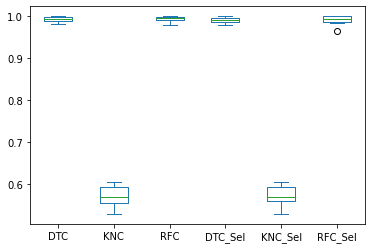

In [ ]:
#Se hace un diagrama de boxplots para decidir que modelo se va a implementar
score.columns=['DTC', 'KNC', 'RFC', 'DTC_Sel',
       'KNC_Sel', 'RFC_Sel']
score.plot(kind='box')

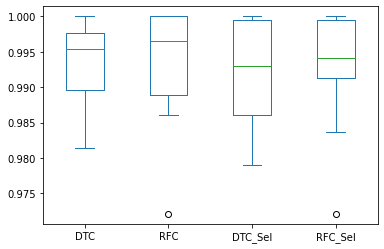

In [ ]:
#Se implementa la misma funcion pero en este caso se van a tener en cuenta los modelos2
modelos2=list([DTC, m_rf])
def medir_modelos(modelos2,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos2:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["DecisionTreeClassifier","RandomForestClassifier"]
    return metric_modelos

score11 = medir_modelos(modelos2, 'accuracy', X, y, kfold, cross_val_score, pd)
score22 = medir_modelos(modelos2, 'accuracy', X2, y, kfold, cross_val_score, pd)

scoref =pd.concat([score11, score22],axis=1)

scoref.columns=['DTC', 'RFC', 'DTC_Sel','RFC_Sel']
scoref.plot(kind='box')

* Modelo seleccionado: RandomForestClassifier




* DecisionTreeClassifier

In [ ]:
#Creación del modelo
model = DecisionTreeClassifier() 
score = 'accuracy' 
resultado = cross_val_score(model,X2,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.13953488372094


In [ ]:
#Evaluación de overfitting y underfitting
results = cross_validate(DecisionTreeClassifier(),X2,y,return_train_score=True,cv=5) 
results
test_scores = results['test_score']
train_scores = results['train_score']
#score de entrenamiento 
print(np.mean(train_scores))
#score de prueba
print(np.mean(test_scores)) 

1.0
0.9993023255813954


* KNeighborsClassifier

In [ ]:
#creación de modelo 
model = KNeighborsClassifier() 
score = 'accuracy' 
resultado = cross_val_score(model,X2,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  57.18604651162791


In [ ]:
#Evaluación de overfitting y underfitting
results = cross_validate(KNeighborsClassifier(),X2,y,return_train_score=True,cv=5) 
results
test_scores = results['test_score']
train_scores = results['train_score']
#score de entrenamiento
print(np.mean(train_scores))
#Score de prueba
print(np.mean(test_scores)) 

0.8249418604651163
0.6641860465116279


* RandomForestClassifier

In [ ]:
#Creación de modelo 
model = RandomForestClassifier() 
score = 'accuracy' 
resultado = cross_val_score(model,X2,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.2093023255814


In [ ]:
#Evaluación de overfitting y underfitting
results = cross_validate(RandomForestClassifier(),X2,y,return_train_score=True,cv=5)
results
test_scores = results['test_score']
train_scores = results['train_score']
#Score de entrenamiento 
print(np.mean(train_scores)) 
#Score de prueba
print(np.mean(test_scores))


1.0
0.9997674418604652


* Metricas de precisión

In [ ]:
#Reporte de clasificación RFC
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
reporte = classification_report(Y_test, predicted)
print(reporte)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       536
           1       0.95      0.98      0.96       883

    accuracy                           0.95      1419
   macro avg       0.96      0.95      0.95      1419
weighted avg       0.95      0.95      0.95      1419



In [ ]:
#Reporte de clasificación DTC
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
reporte = classification_report(Y_test, predicted)
print(reporte)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       536
           1       0.96      0.92      0.94       883

    accuracy                           0.93      1419
   macro avg       0.92      0.93      0.92      1419
weighted avg       0.93      0.93      0.93      1419



In [ ]:
#se decide elegir el RandomForestClassifier

AFINAMIENTO DE HIPERPARÁMETROS

In [ ]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        X2,
                                        y,
                                        random_state = 123
                                    )


In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

In [ ]:
# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Grid de hiperparámetros evaluados
param_grid = {'n_estimators': [100],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10],
              'criterion'   : ['gini', 'entropy']
             }

In [ ]:
# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 20),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=20), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=20),
             estimator=RandomForestClassifier(random_state=20), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 10], 'max_features': [5, 7, 9],
                         'n_estimators': [100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,gini,None,5,100,0.932817,0.018219,1.0,0.0
9,entropy,None,5,100,0.931783,0.018562,1.0,0.0
10,entropy,None,7,100,0.931370,0.019858,1.0,0.0
1,gini,None,7,100,0.930646,0.014659,1.0,0.0


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} : 0.9328165374677001 accuracy


In [ ]:
#Guardar modelo final 
modelo_final = grid.best_estimator_

DESPLIEGUE DEL MODELO

In [ ]:
# Error de test del modelo final
predicciones = modelo_final.predict(X = X_test_prep)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
#Calcular matriz de confusión
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )
#Calcular precisión del modelo
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[380  23]
 [  9 663]]

El accuracy de test es: 97.0232558139535 %


In [ ]:
#Mostrar un reporte de clasificación
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       403
           1       0.97      0.99      0.98       672

    accuracy                           0.97      1075
   macro avg       0.97      0.96      0.97      1075
weighted avg       0.97      0.97      0.97      1075



In [ ]:
#Evaluación de overfitting y underfitting
results = cross_validate(modelo_final,X2,y,return_train_score=True,cv=5) 
results
test_scores = results['test_score']
train_scores = results['train_score']
#score de entrenamiento
print(np.mean(train_scores)) 
#score de prueba
print(np.mean(test_scores)) 

1.0
0.9995348837209302


SOLUCIONES DE LOS PROBLEMAS ANALITICOS

In [ ]:
# Predicción de probabilidades
predicciones = modelo_final.predict_proba(X = X_test_prep)
predicciones[:5, :]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([[0.14, 0.86],
       [0.21, 0.79],
       [0.06, 0.94],
       [0.16, 0.84],
       [0.05, 0.95]])

In [ ]:
# Clasificación empleando la clase de mayor probabilidad
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(3)

,0,1,clasificacion_default_0.5
0,0.14,0.86,1
1,0.21,0.79,1
2,0.06,0.94,1


 * Variables generales que influyen en la insatisfacción de los empleados

In [ ]:
#Dataframe con las variables influyentes
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,MonthlyIncome,0.148844
0,Age,0.108895
1,DistanceFromHome,0.098675
13,TotalWorkingYears,0.089637
11,PercentSalaryHike,0.084200
16,YearsAtCompany,0.072677
18,YearsWithCurrManager,0.064373
10,NumCompaniesWorked,0.061658
14,TrainingTimesLastYear,0.059584
17,YearsSinceLastPromotion,0.054092


In [ ]:
#Grafico de importancia
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train_prep,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with f

,importances_mean,importances_std,feature
9,0.295797,0.008359,MonthlyIncome
0,0.157439,0.004366,Age
10,0.156948,0.007026,NumCompaniesWorked
11,0.116858,0.007053,PercentSalaryHike
1,0.096244,0.006277,DistanceFromHome
18,0.063442,0.008253,YearsWithCurrManager
16,0.059778,0.004851,YearsAtCompany
13,0.050795,0.004953,TotalWorkingYears
17,0.039719,0.005902,YearsSinceLastPromotion
15,0.034914,0.004620,WorkLifeBalance_2.0


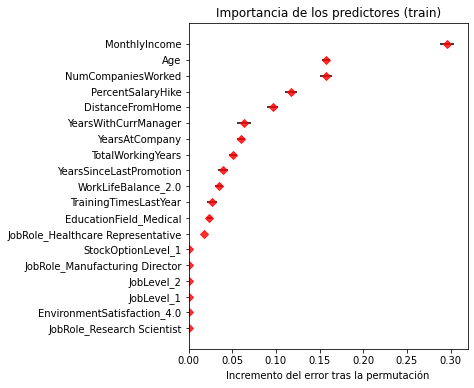

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');